## <div align="center"> UJIAN TENGAH SEMESTER IF540 MACHINE LEARNING</div>
### <div  align="center"> Program Studi Informatika </div>
#### <div align="center"> Semester Gasal 2023/2024 </div>

In [1]:
#Harap jalankan code ini ketika Anda melakukan restart kernel machine
#Masukkan nama dan NIM Anda
import datetime
import uuid

myName = "Nisa'ul Fadhilah"
myNIM = "00000060236"

In [2]:
myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Nisa'ul Fadhilah
NIM: 		00000060236
Start: 		2023-10-21 12:17:50.091341
Device ID: 	2db7830b-6fd1-11ee-99d5-2c3b70a37f3c


### Dataset

dataset yang digunakan adalah onsite-caesarian.csv yang berisi data medis terkait kehamilan dan persalinan pasien. Atribut 'Age', 'Delivery No', dan 'Delivery Time' berisi informasi tentang usia, jumlah persalinan, dan waktu persalinan. Atribut 'Blood Pressure' memberikan informasi tentang tekanan darah. Atribut 'Heart Problem' adalah atribut kategoris yang mengidentifikasi apakah pasien memiliki masalah jantung atau tidak. Atribut 'Caesarian' adalah atribut target yang menunjukkan apakah pasien menjalani operasi caesarian atau tidak.


### Hasil kerja

#### Importing library

In [3]:
#Import the libraries that are needed for your task here
import numpy as np

#### Your codes are here

In [4]:
import pandas as pd
caesar = pd.read_csv("onsite-caesarian.csv")
caesar

,Age,Delivery No,Delivery Time,Blood Pressure,Heart Problem,Caesarian
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1
...,...,...,...,...,...,...
75,27,2,1,1,0,0
76,33,4,0,1,0,1
77,29,2,1,2,0,1
78,25,1,2,0,0,1


In [5]:
input_features = caesar.drop("Caesarian", axis=1)   
target = caesar["Caesarian"]

print("Atribut (Input):")
print(input_features)

print("Target (Output/Label):")
print(target)

Atribut (Input):
    Age  Delivery No  Delivery Time  Blood Pressure  Heart Problem
0    22            1              0               2              0
1    26            2              0               1              0
2    26            2              1               1              0
3    28            1              0               2              0
4    22            2              0               1              0
..  ...          ...            ...             ...            ...
75   27            2              1               1              0
76   33            4              0               1              0
77   29            2              1               2              0
78   25            1              2               0              0
79   24            2              2               1              0

[80 rows x 5 columns]
Target (Output/Label):
0     0
1     1
2     0
3     0
4     1
     ..
75    0
76    1
77    1
78    1
79    0
Name: Caesarian, Length: 80, dtype: int64


In [6]:
caesar.dtypes

Age               int64
Delivery No       int64
Delivery Time     int64
Blood Pressure    int64
Heart Problem     int64
Caesarian         int64
dtype: object

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(input_features, target, test_size=0.2, random_state=42)


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(input_features, target, test_size=0.2, random_state=42)

k=5
 
model = KNeighborsClassifier(n_neighbors=k)

 
model.fit(X_train, y_train)


KNeighborsClassifier()

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data menjadi training set dan test set
X_train, X_test, y_train, y_test = train_test_split(input_features, target, test_size=0.2, random_state=42)

best_k = None
best_accuracy = 0

# Coba berbagai nilai K (jumlah tetangga) dalam range tertentu
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"Parameter K terbaik: {best_k}")
print(f"Akurasi model terbaik: {best_accuracy}")

# Cetak test set
print("Test set: \nX_test:\n{}\n\ny_test:\n{}\n".format(X_test, y_test))

# Cetak prediksi dari model terbaik
best_model = KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print("Test set predictions (model terbaik): {}".format(y_pred))


Parameter K terbaik: 11
Akurasi model terbaik: 0.6875
Test set: 
X_test:
    Age  Delivery No  Delivery Time  Blood Pressure  Heart Problem
30   25            1              0               0              0
0    22            1              0               2              0
22   25            1              1               2              0
31   40            1              0               1              1
18   37            3              0               1              1
28   32            1              0               2              1
10   36            1              0               1              0
70   17            1              0               0              0
4    22            2              0               1              0
12   23            1              1               1              0
49   29            2              0               0              1
33   27            2              0               1              1
67   29            2              0               1     

In [11]:
from sklearn.metrics import accuracy_score

 
y_pred = model.predict(X_test)

 
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model KNN: {accuracy}")

Akurasi model KNN: 0.5625


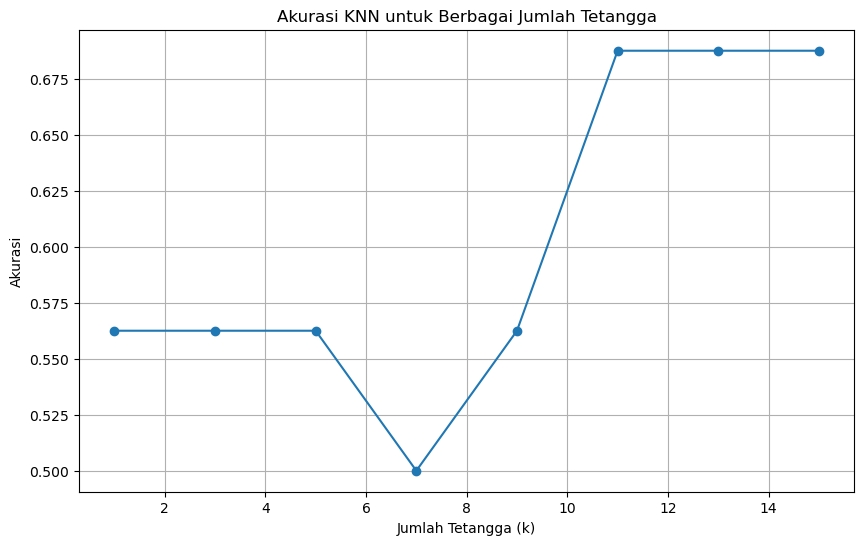

In [12]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

 
X_train, X_test, y_train, y_test = train_test_split(input_features, target, test_size=0.2, random_state=42)

 
neighbors_values = [1, 3, 5, 7, 9, 11, 13, 15]

 
accuracies = []

for k in neighbors_values:
     
    model = KNeighborsClassifier(n_neighbors=k)

     
    model.fit(X_train, y_train)

     
    y_pred = model.predict(X_test)

    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot hasil akurasi
plt.figure(figsize=(10, 6))
plt.plot(neighbors_values, accuracies, marker='o', linestyle='-')
plt.title('Akurasi KNN untuk Berbagai Jumlah Tetangga')
plt.xlabel('Jumlah Tetangga (k)')
plt.ylabel('Akurasi')
plt.grid(True)
plt.show()


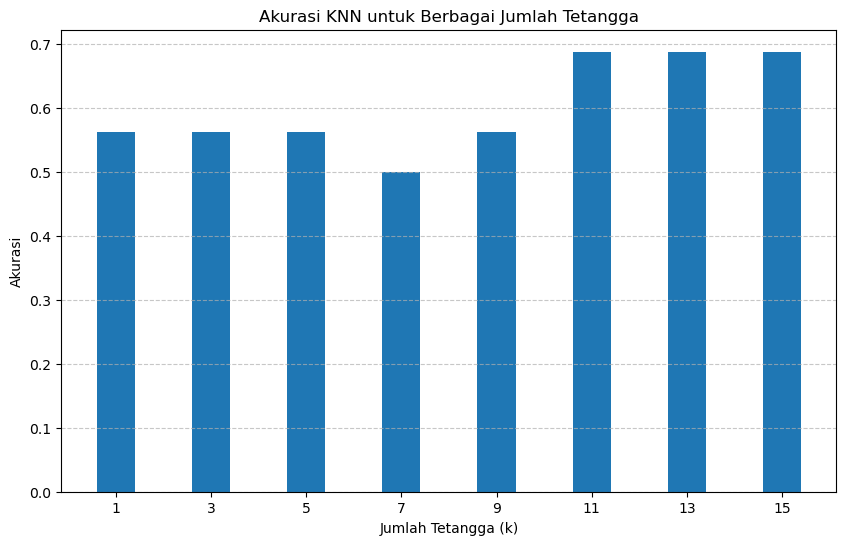

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

 
X_train, X_test, y_train, y_test = train_test_split(input_features, target, test_size=0.2, random_state=42)

 
neighbors_values = [1, 3, 5, 7, 9, 11, 13, 15]

 
accuracies = []

for k in neighbors_values:
 
    model = KNeighborsClassifier(n_neighbors=k)

  
    model.fit(X_train, y_train)

   
    y_pred = model.predict(X_test)

 
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

 
plt.figure(figsize=(10, 6))
plt.bar(neighbors_values, accuracies)
plt.title('Akurasi KNN untuk Berbagai Jumlah Tetangga')
plt.xlabel('Jumlah Tetangga (k)')
plt.ylabel('Akurasi')
plt.xticks(neighbors_values)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data menjadi training set dan test set
X_train, X_test, y_train, y_test = train_test_split(input_features, target, test_size=0.2, random_state=42)

best_k = None
best_accuracy = 0

# Coba berbagai nilai K (jumlah tetangga) dalam range tertentu
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"Parameter K terbaik: {best_k}")
print(f"Akurasi model terbaik: {best_accuracy}")


Parameter K terbaik: 11
Akurasi model terbaik: 0.6875


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

 
X_train, X_test, y_train, y_test = train_test_split(input_features, target, test_size=0.2, random_state=42)

 
model = DecisionTreeClassifier()

 
model.fit(X_train, y_train)

 
y_pred = model.predict(X_test)

 
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model Decision Tree (parameter default): {accuracy}")


Akurasi model Decision Tree (parameter default): 0.4375


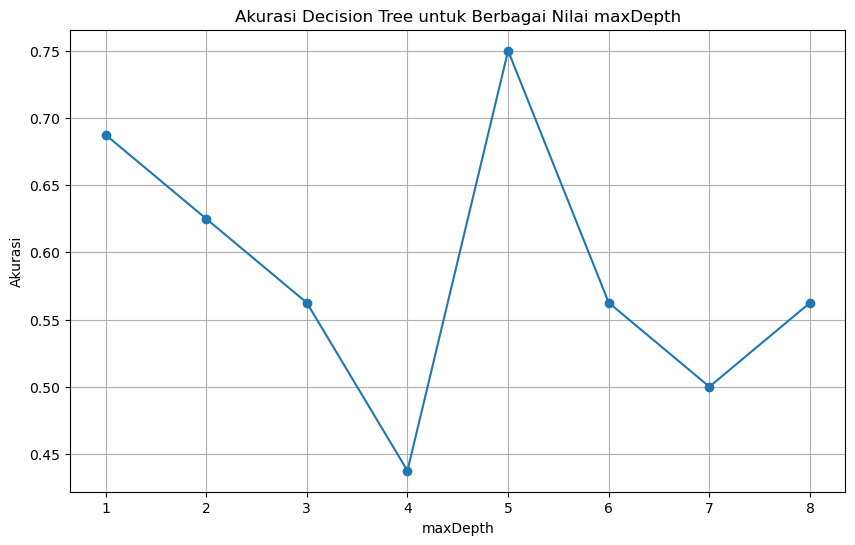

In [16]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

 
X_train, X_test, y_train, y_test = train_test_split(input_features, target, test_size=0.2, random_state=42)

 
max_depth_values = [1, 2, 3, 4, 5, 6, 7, 8]

 
accuracies = []

for max_depth in max_depth_values:
 
    model = DecisionTreeClassifier(max_depth=max_depth)

     
    model.fit(X_train, y_train)

  
    y_pred = model.predict(X_test)

 
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

 
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, accuracies, marker='o', linestyle='-')
plt.title('Akurasi Decision Tree untuk Berbagai Nilai maxDepth')
plt.xlabel('maxDepth')
plt.ylabel('Akurasi')
plt.grid(True)
plt.show()


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

 
X_train, X_test, y_train, y_test = train_test_split(input_features, target, test_size=0.2, random_state=42)

 
model = DecisionTreeClassifier(max_depth=3, min_samples_split=2, min_samples_leaf=1)

 
model.fit(X_train, y_train)

 
y_pred = model.predict(X_test)

 
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model Decision Tree (parameter terbaik): {accuracy}")


Akurasi model Decision Tree (parameter terbaik): 0.5


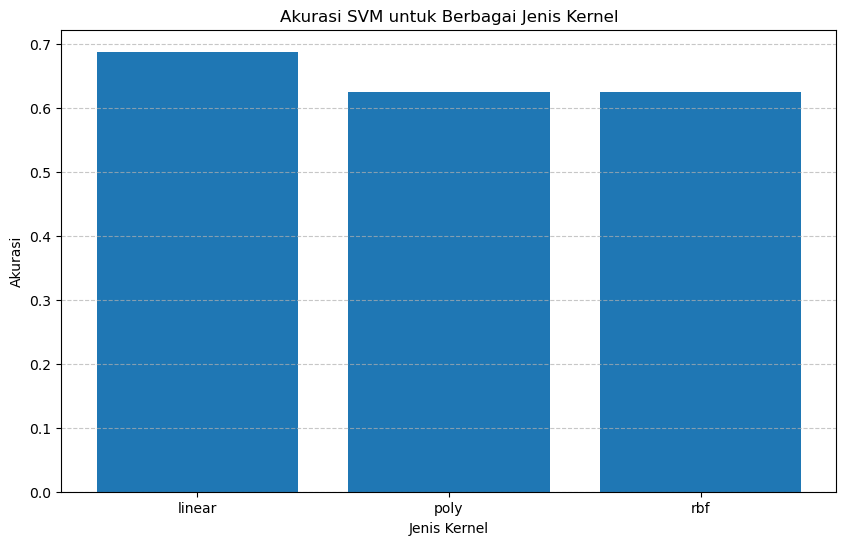

In [18]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

 
X_train, X_test, y_train, y_test = train_test_split(input_features, target, test_size=0.2, random_state=42)


kernels = ['linear', 'poly', 'rbf']

 
accuracies = []

for kernel_type in kernels:
   
    model = SVC(kernel=kernel_type)

     
    model.fit(X_train, y_train)

     
    y_pred = model.predict(X_test)

 
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

 
plt.figure(figsize=(10, 6))
plt.bar(kernels, accuracies)
plt.title('Akurasi SVM untuk Berbagai Jenis Kernel')
plt.xlabel('Jenis Kernel')
plt.ylabel('Akurasi')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


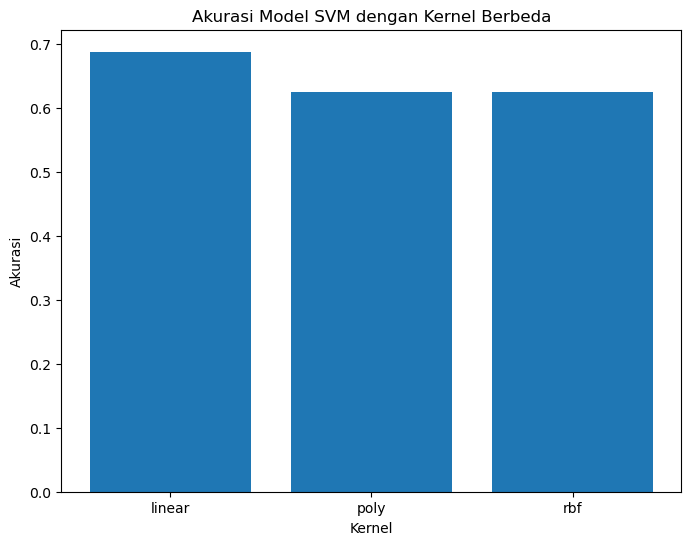

In [29]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Split data menjadi training set dan test set
X_train, X_test, y_train, y_test = train_test_split(input_features, target, test_size=0.2, random_state=42)

# Inisialisasi model SVM dengan kernel yang berbeda
kernels = ['linear', 'poly', 'rbf']
accuracies = []

for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot hasil akurasi
plt.figure(figsize=(8, 6))
plt.bar(kernels, accuracies)
plt.xlabel('Kernel')
plt.ylabel('Akurasi')
plt.title('Akurasi Model SVM dengan Kernel Berbeda')
plt.show()


In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

 
X_train, X_test, y_train, y_test = train_test_split(input_features, target, test_size=0.2, random_state=42)

 
model = MultinomialNB()

 
model.fit(X_train, y_train)
 
y_pred = model.predict(X_test)

 
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model Naïve Bayes: {accuracy}")


Akurasi model Naïve Bayes: 0.75


In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

 
X_train, X_test, y_train, y_test = train_test_split(input_features, target, test_size=0.2, random_state=42)

 
alpha_values = [0.1, 1.0, 10.0]   

best_accuracy = 0
best_alpha = None
best_model = None

for alpha in alpha_values:
    model = MultinomialNB(alpha=alpha)
    
 
    model.fit(X_train, y_train)
    
 
    y_pred = model.predict(X_test)
    
  
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_alpha = alpha
        best_model = model

print(f"Parameter Terbaik (alpha): {best_alpha}")
print(f"Akurasi model terbaik: {best_accuracy}")


Parameter Terbaik (alpha): 0.1
Akurasi model terbaik: 0.75


In [32]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 		Nisa'ul Fadhilah
NIM: 		00000060236
Time-stamp:	2023-10-21 12:50:51.374829


### Save the notebook, then convert the notebook to html (by running the next code).

In [34]:
!jupyter nbconvert --to html "./UTS2023-IF540-00000060236-NisaulFadhilah.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./UTS2023-IF540-00000060236-NisaulFadhilah.ipynb to html
[NbConvertApp] Writing 846055 bytes to UTS2023-IF540-00000060236-NisaulFadhilah.html
